In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
import copy
from tqdm.notebook import tqdm
from numba import jit
from scipy import stats
import networkx as nx
import random
import re
from validation_functions import *
from numba import njit

plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb,amsmath}'

plt.rcParams["figure.figsize"] = 11.7, 8.3
plt.rcParams["figure.dpi"] = 75

plt.rcParams["font.size"] = 22
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.fontsize"] = "small"

plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["lines.markersize"] = 14
plt.rcParams["lines.markeredgewidth"] = 2
cd de
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
colors = ["#e76254", "#ef8a47", "#f7aa58", "#ffd06f", "#ffe6b7", 
          "#aadce0", "#72bcd5", "#528fad", "#376795","#1e466e"]

df = pd.read_csv("/home/rob/MEGAsync/datasets/networks/Synthetic/fix_slow_version/f-mercator-networks/check-dim-vs-cb/df_properties_weighted.csv")

title = r'$N=2000,\left<k\right>=10,\beta=3,\gamma=2.7, \\ N_f=1000, \beta_b=100D, \left<k_n\right>=20$'
df.head()

,dim,B_s,g_s,Ns_obs,k_s,g_n,k_n,g_f,N_f,B_bi,i,cb_nodes,cb_features,mean_degree_nodes
0,9,3.0,2.7,2000,10,2.5,20,3.5,1000,100,3,0.203448,0.218756,19.2930
1,4,3.0,2.7,2000,10,3.5,20,2.5,1000,100,8,0.436084,0.432083,18.6155
2,1,3.0,2.7,2000,10,2.5,20,3.5,1000,100,2,0.835750,0.839993,19.3510
3,1,3.0,2.7,2000,10,3.5,20,3.5,1000,100,2,0.800957,0.805127,19.6700
4,8,3.0,2.7,2000,10,3.5,20,3.5,1000,100,1,0.192487,0.194432,20.1870


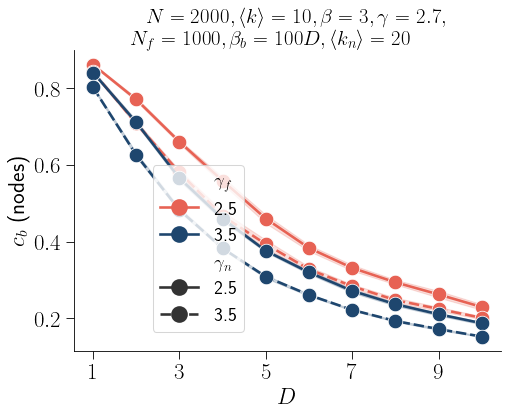

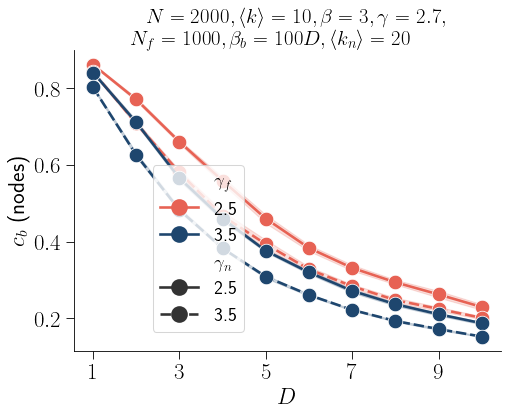

In [6]:
g = sns.relplot(
    data=df, x="dim", y="cb_nodes", hue="g_f", style="g_n",
    kind="line", height=6, marker='o', palette=[colors[0], colors[-1]]
)

g.axes[0][0].set_ylabel(r'$c_b$ (nodes)')
g.axes[0][0].set_xlabel(r'$D$')

h, l = g.axes[0][0].get_legend_handles_labels()
for i, label in enumerate(l):
    if "g_f" in label:
        l[i] = label.replace("g_f", r'$\gamma_f$')
    if "g_n" in label:
        l[i] = label.replace("g_n", r'$\gamma_n$')

g._legend.remove()
g.fig.legend(h, l, loc=(0.3, 0.2))
g.axes[0][0].set_xticks(range(1, 11, 2))
g.axes[0][0].set_title(title, fontsize=20)

plt.tight_layout()
plt.show()
# plt.savefig("/home/rob/Dropbox/Robert/FeatureMercator/Reports/weighted-bipartite-clustering-03-07-24/plots/weighted_bipartite_clustering_nodes_vs_dimensions.pdf")



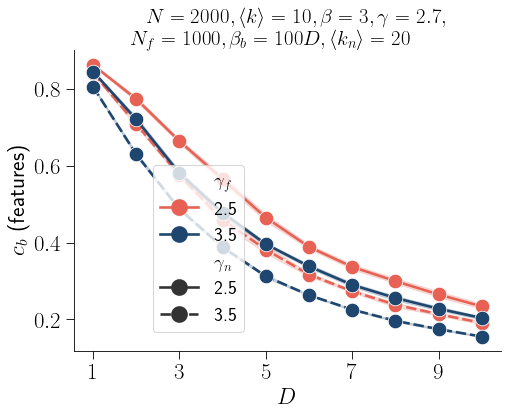

In [7]:
g = sns.relplot(
    data=df, x="dim", y="cb_features", hue="g_f", style="g_n",
    kind="line", height=6, marker='o', palette=[colors[0], colors[-1]]
)

g.axes[0][0].set_ylabel(r'$c_b$ (features)')
g.axes[0][0].set_xlabel(r'$D$')

h, l = g.axes[0][0].get_legend_handles_labels()
for i, label in enumerate(l):
    if "g_f" in label:
        l[i] = label.replace("g_f", r'$\gamma_f$')
    if "g_n" in label:
        l[i] = label.replace("g_n", r'$\gamma_n$')

g._legend.remove()
g.fig.legend(h, l, loc=(0.3, 0.2))
g.axes[0][0].set_xticks(range(1, 11, 2))
g.axes[0][0].set_title(title, fontsize=20)

plt.tight_layout()
plt.show()
# plt.savefig("/home/rob/Dropbox/Robert/FeatureMercator/Reports/weighted-bipartite-clustering-03-07-24/plots/weighted_bipartite_clustering_features_vs_dimensions.pdf")


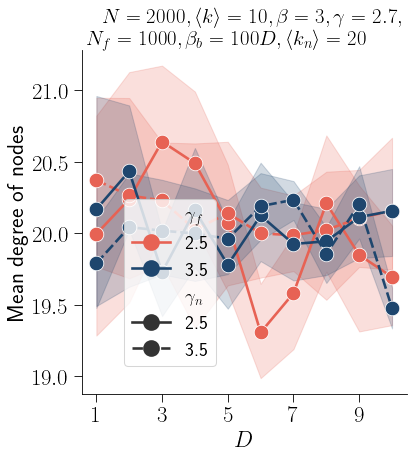

In [8]:
g = sns.relplot(
    data=df, x="dim", y="mean_degree_nodes", hue="g_f", style="g_n",
    kind="line", height=6, marker='o', palette=[colors[0], colors[-1]]
)

g.axes[0][0].set_ylabel(r'Mean degree of nodes')
g.axes[0][0].set_xlabel(r'$D$')

h, l = g.axes[0][0].get_legend_handles_labels()
for i, label in enumerate(l):
    if "g_f" in label:
        l[i] = label.replace("g_f", r'$\gamma_f$')
    if "g_n" in label:
        l[i] = label.replace("g_n", r'$\gamma_n$')

g._legend.remove()
g.fig.legend(h, l, loc=(0.3, 0.2))
g.axes[0][0].set_xticks(range(1, 11, 2))
g.axes[0][0].set_title(title, fontsize=20)

plt.show()
# plt.savefig("/home/rob/Dropbox/Robert/FeatureMercator/Reports/weighted-bipartite-clustering-03-07-24/plots/mean_degree_vs_dimensions.pdf")


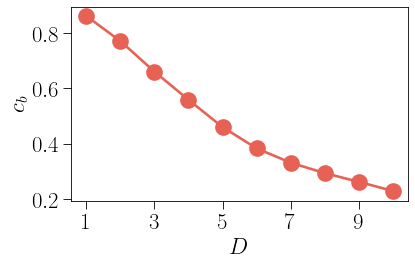

In [22]:
cols = ['dim','cb_nodes']

new_df = df[(df['g_n'] == 2.5) & (df['g_f'] == 2.5)] 
g = (new_df[cols]
     .dropna(subset=cols)
     .assign(dim=lambda x: pd.to_numeric(x['dim'], errors='coerce'))
     .dropna(subset=['dim'])
     .groupby('dim')
     .agg(mean_cb_nodes=('cb_nodes','mean'),
          sem_cb_nodes =('cb_nodes', lambda x: x.std(ddof=1)/np.sqrt(len(x))),
          n=('cb_nodes','size'))
     .sort_index()
     .reset_index())

plt.figure(figsize=(6, 4))
plt.errorbar(g['dim'], g['mean_cb_nodes'], yerr=g['sem_cb_nodes'], fmt='o-', color=colors[0])
plt.xlabel('$D$')
plt.ylabel('$c_b$')
plt.xticks(range(1,11,2))
plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/Robert/FeatureMercator/ReSubmissionCommPhys/Rebuttal/plots/clustering_vs_dim.pdf")